In [3]:

import pandas as pd
url_dl_static1 = "B_2019.12.16_13.40.04.csv"
url_dl_static2 = "B_2020.01.16_10.43.34.csv"
url_dl_static3 = "B_2020.02.13_13.57.29.csv"
url_dl_static4 = "B_2020.02.14_13.21.26.csv"
url_dl_static5 = "B_2020.02.27_18.39.27.csv"


df_dl_static1 = pd.read_csv(url_dl_static1)
df_dl_static2 = pd.read_csv(url_dl_static2)
df_dl_static3 = pd.read_csv(url_dl_static3)
df_dl_static4 = pd.read_csv(url_dl_static4)
df_dl_static5 = pd.read_csv(url_dl_static5)

dfs = [df_dl_static1, df_dl_static2, df_dl_static3, df_dl_static4, df_dl_static5]
df = pd.concat(dfs)
# sanitize the data that i'll be using and that have some string instead float
# df = df[(df.NRxRSRP != '-') & (df.NRxRSRQ != '-')]
df.info()

df_qoe = df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15617 entries, 0 to 5990
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Timestamp     15617 non-null  object 
 1   Longitude     15617 non-null  float64
 2   Latitude      15617 non-null  float64
 3   Speed         15617 non-null  int64  
 4   Operatorname  15617 non-null  object 
 5   CellID        15617 non-null  int64  
 6   NetworkMode   15617 non-null  object 
 7   RSRP          15617 non-null  int64  
 8   RSRQ          15617 non-null  object 
 9   SNR           15617 non-null  float64
 10  CQI           15617 non-null  int64  
 11  RSSI          15617 non-null  object 
 12  DL_bitrate    15617 non-null  int64  
 13  UL_bitrate    15617 non-null  int64  
 14  State         15617 non-null  object 
 15  PINGAVG       15617 non-null  object 
 16  PINGMIN       15617 non-null  object 
 17  PINGMAX       15617 non-null  object 
 18  PINGSTDEV     15617 non-nul

In [4]:
df_qoe.describe()


,Longitude,Latitude,Speed,CellID,RSRP,SNR,CQI,DL_bitrate,UL_bitrate,RAWCELLID
count,15617.000000,15617.000000,15617.0,15617.0,15617.000000,15617.000000,15617.000000,15617.000000,15617.000000,15617.0
mean,-8.394604,51.886200,0.0,11.0,-99.914964,2.789524,10.485561,66655.832490,146.119101,10805003.0
std,0.000047,0.000060,0.0,0.0,2.750734,3.583900,2.085503,77031.047754,109.743434,0.0
min,-8.394656,51.886113,0.0,11.0,-108.000000,-11.000000,1.000000,0.000000,0.000000,10805003.0
25%,-8.394656,51.886144,0.0,11.0,-102.000000,1.000000,9.000000,11156.000000,67.000000,10805003.0
50%,-8.394628,51.886198,0.0,11.0,-100.000000,3.000000,11.000000,29359.000000,141.000000,10805003.0
75%,-8.394564,51.886262,0.0,11.0,-98.000000,5.000000,12.000000,98442.000000,218.000000,10805003.0
max,-8.394545,51.886262,0.0,11.0,-93.000000,15.000000,15.000000,333070.000000,1251.000000,10805003.0


In [5]:
df_qoe.columns

Index(['Timestamp', 'Longitude', 'Latitude', 'Speed', 'Operatorname', 'CellID',
       'NetworkMode', 'RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate',
       'UL_bitrate', 'State', 'PINGAVG', 'PINGMIN', 'PINGMAX', 'PINGSTDEV',
       'PINGLOSS', 'CELLHEX', 'NODEHEX', 'LACHEX', 'RAWCELLID', 'NRxRSRP',
       'NRxRSRQ'],
      dtype='object')

In [6]:
# original
# _x = df[['SNR', 'DL_bitrate', 'UL_bitrate', 'NRxRSRP', 'NRxRSRQ']]
# new
_x = df[['SNR', 'DL_bitrate', 'UL_bitrate']]
_y = df['CQI']

print(_x)
print(_y)

       SNR  DL_bitrate  UL_bitrate
0      1.0          72          20
1      7.0           0           0
2      7.0           0           0
3      7.0           0           0
4     -7.0           0           0
...    ...         ...         ...
5986  13.0           0           0
5987   9.0       84590         378
5988   9.0      276708         357
5989   6.0      276724         193
5990   6.0       40469          43

[15617 rows x 3 columns]
0       15
1       15
2       15
3       15
4       11
        ..
5986    10
5987    10
5988    10
5989    11
5990    11
Name: CQI, Length: 15617, dtype: int64


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np

x_train, x_test, y_train, y_test = train_test_split(_x.values.reshape(-1,3), _y, random_state=30, test_size=0.50)

model = LinearRegression().fit(x_train,y_train)


print("This is the coeficient of X =", list(zip(_x, model.coef_)),"\n")

print("This is the intercept value of Y when X = 0 \n", model.intercept_, "\n")

predict_var = y_pred_mlr
criter_var = y_test
n1 = len(predict_var)
n2 = len(criter_var)
mul_pred_criter = [
                  a * b for a,b in 
                  zip(predict_var, criter_var)
                  ]

square_each_element_predict = [a*a for a in predict_var]
square_each_element_criter =  [b*b for b in criter_var] 

sum_predict_var = sum(predict_var)
sum_criter_var = sum(criter_var)
sum_square_predict = sum(square_each_element_predict)
sum_square_criter = sum(square_each_element_criter)
sum_mul_pred_criter = sum(mul_pred_criter)

numerator = (
            n1*sum_mul_pred_criter - 
            sum_predict_var*sum_criter_var
            )

denominator = n1*sum_square_predict - sum_predict_var**2

slope = numerator/denominator
print("This is the slope =", slope)

print("Here we can find out the prediction of our model already trained and compare the precision of this: \n")
y_pred_mlr = model.predict(x_test)
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()


This is the coeficient of X = [('SNR', 0.044431365371400786), ('DL_bitrate', 2.3504186617234405e-06), ('UL_bitrate', -0.000796949718440099)] 

This is the intercept value of Y when X = 0 
 10.31948342874107 

This is the slope = 0.8584633687108808
Here we can find out the prediction of our model already trained and compare the precision of this: 



,Actual value,Predicted value
393,11,10.223098
1179,11,10.440358
2602,8,10.490272
910,12,10.222136
486,12,10.549872


0.7342431229508728


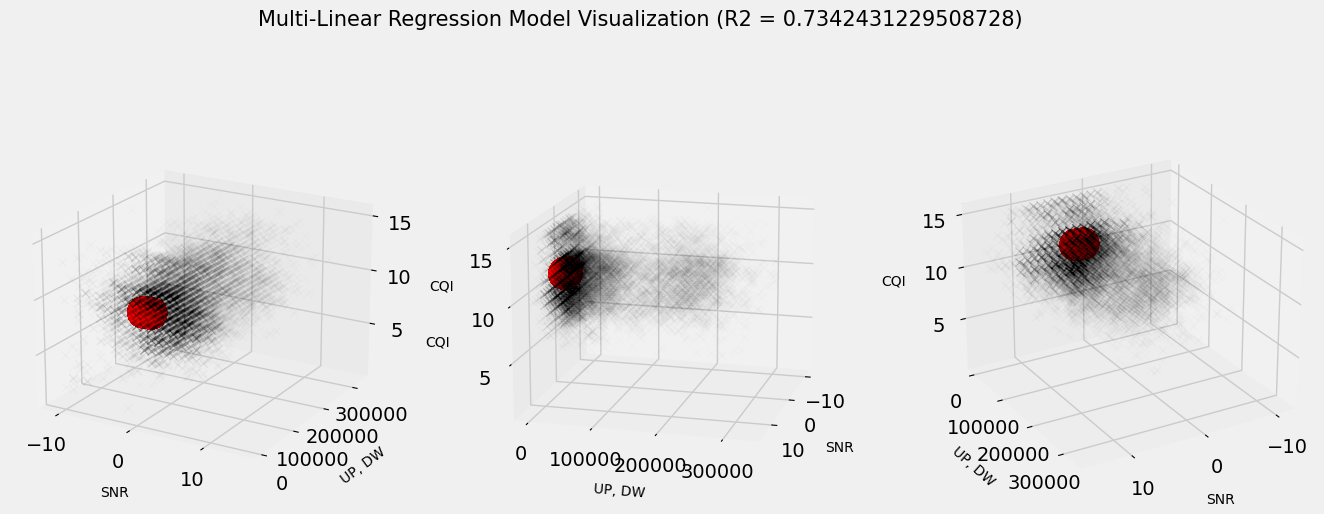

In [88]:
import matplotlib.pyplot as plt
import random
# Y = a+bx
# a = intercepto
# b = inclinação
# x = 
r2 = model.score(x_test, y_test)*100
print(r2)

################################### adjusting our data
x = _x.values.reshape(-1,3)[:, 0]
y = _x.values.reshape(-1,3)[: ,1]
z = _y

x_range = np.linspace(1, 5, 30)    
y_range = np.linspace(1, 5, 30)   
x1_range = np.linspace(30, 50, 90)  
x_range, y_range, x1_range = np.meshgrid(x_range, y_range, x1_range)

viz = np.array([x_range.flatten(), y_range.flatten(), x1_range.flatten()]).T 

pred = model.predict(viz)

##########################################################

################################ setting the 3d graph


plt.style.use('fivethirtyeight') 

fig = plt.figure(figsize = (15, 6))  
  
axis1 = fig.add_subplot(131, projection = '3d')  
axis2 = fig.add_subplot(132, projection = '3d')  
axis3 = fig.add_subplot(133, projection = '3d')  
  
axes = [axis1, axis2, axis3]

for ax in axes:  
    ax.plot(x, y, z, color='k', zorder = 10, linestyle = 'none', marker = 'x', alpha = 0.01)  
    ax.scatter(x_range.flatten()[0:800], y_range.flatten()[0:800], pred[0:800], facecolor = (1,0,0,1), s = 500, edgecolor = '#ff0000')
    ax.set_xlabel('SNR', fontsize = 10, labelpad = 10)  
    ax.set_ylabel('UP, DW', fontsize = 10, labelpad = 10)  
    ax.set_zlabel('CQI', fontsize = 10, labelpad = 10)  
    ax.locator_params(nbins = 3, axis = 'x')  
    ax.locator_params(nbins = 3, axis = 'x')
    
    axis1.view_init(elev=20, azim=-60)  
    axis2.view_init(elev=15, azim=15)  
    axis3.view_init(elev=25, azim=60)
    
    fig.suptitle(f'Multi-Linear Regression Model Visualization (R2 = {r2})', fontsize = 15, color = 'k')  
